In [1]:
import matplotlib.colors as mcolors
import matplotlib.animation as ma
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from itertools import product
from scipy import stats
import pandas as pd
import numpy as np
import numba as nb
import imageio
import os
import shutil
import sys
sys.path.append("../")

randomSeed = 100

%matplotlib inline
%config InlineBackend.figure_format = "retina"

new_cmap = mcolors.LinearSegmentedColormap.from_list(
    "new", plt.cm.jet(np.linspace(0, 1, 256)) * 0.85, N=256
)

@nb.njit
def colors_idx(phaseTheta):
    return np.floor(256 - phaseTheta / (2 * np.pi) * 256).astype(np.int32)

import seaborn as sns

sns.set_theme(
    style="ticks", 
    font_scale=1.1, rc={
    'figure.figsize': (6, 5),
    'axes.facecolor': 'white',
    'figure.facecolor': 'white',
    'grid.color': '#dddddd',
    'grid.linewidth': 0.5,
    "lines.linewidth": 1.5,
    'text.color': '#000000',
    'figure.titleweight': "bold",
    'xtick.color': '#000000',
    'ytick.color': '#000000'
})

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
#plt.rcParams['animation.ffmpeg_path'] = "/opt/conda/bin/ffmpeg"

from PJT_Frustration_Induced_Crystallize.main import *
from multiprocessing import Pool
import pandas as pd

# colors = ["#403990", "#80A6E2", "#FBDD85", "#F46F43", "#CF3D3E"]
# cmap = mcolors.LinearSegmentedColormap.from_list("my_colormap", colors)

colors = ["#403990", "#3A76D6", "#FFC001", "#F46F43", "#FF0000"]
cmap = mcolors.LinearSegmentedColormap.from_list("my_colormap", colors)
cmap_r = mcolors.LinearSegmentedColormap.from_list("my_colormap", colors[::-1])

# SAVE_PATH = r"E:\MS_ExperimentData\general"
# MP4_PATH = r"E:\MS_ExperimentData\mp4"

SAVE_PATH = r"D:\MS_ExperimentData\general"
MP4_PATH = r"D:\MS_ExperimentData\mp4"

In [2]:
phaseLags = [0.6 * np.pi]
omegaMins = [0]  # np.linspace(1e-5, 3, 21)
randomSeed = 10
strengthKs = np.linspace(5, 20, 7)  # [20]  # np.linspace(1, 20, 7)
distanceD0s = np.linspace(0.3, 1.1, 7)  #  np.linspace(0.1, 3, 7)  # [1]
deltaOmegas = [0]  # np.linspace(1e-5, 3, 21)  # [1.0]

models = [
    PhaseLagPatternFormation(
        strengthK=strengthK, distanceD0=distanceD0, phaseLagA0=phaseLag,
        freqDist="cauchy", initPhaseTheta=None,
        omegaMin=omegaMin, deltaOmega=deltaOmega, 
        agentsNum=2000, dt=0.005,
        tqdm=True, savePath=SAVE_PATH, shotsnaps=10, 
        randomSeed=randomSeed, overWrite=False
    )
    for strengthK in strengthKs
    for distanceD0 in distanceD0s
    for omegaMin in omegaMins
    for deltaOmega in deltaOmegas
    for phaseLag in phaseLags
]

In [ ]:
phaseLags = [0.6 * np.pi]
omegaMins = [0]  # np.linspace(1e-5, 3, 21)
randomSeed = 10
strengthKs = np.linspace(4, 20, 7)  # [20]  # np.linspace(1, 20, 7)
distanceD0s = np.linspace(0.3, 1.1, 7)  #  np.linspace(0.1, 3, 7)  # [1]
deltaOmegas = [1]  # np.linspace(1e-5, 3, 21)  # [1.0]

models = [
    PhaseLagPatternFormation(
        strengthK=strengthK, distanceD0=distanceD0, phaseLagA0=phaseLag,
        freqDist="uniform", initPhaseTheta=None,
        omegaMin=omegaMin, deltaOmega=deltaOmega, 
        agentsNum=2000, dt=0.005,
        tqdm=True, savePath=SAVE_PATH, shotsnaps=10, 
        randomSeed=randomSeed, overWrite=False
    )
    for strengthK in strengthKs
    for distanceD0 in distanceD0s
    for omegaMin in omegaMins
    for deltaOmega in deltaOmegas
    for phaseLag in phaseLags
]

In [73]:
phaseLags = [0.6 * np.pi]
omegaMins = [0]  # np.linspace(1e-5, 3, 21)
randomSeed = 10
strengthKs = np.linspace(4, 20, 7)  # [20]  # np.linspace(1, 20, 7)
distanceD0s = np.linspace(0.3, 1.1, 7)  #  np.linspace(0.1, 3, 7)  # [1]
deltaOmegas = [0]  # np.linspace(1e-5, 3, 21)  # [1.0]

models = [
    PhaseLagPatternFormation(
        strengthK=strengthK, distanceD0=distanceD0, phaseLagA0=phaseLag,
        freqDist="uniform", initPhaseTheta=None,
        omegaMin=omegaMin, deltaOmega=deltaOmega, 
        agentsNum=2000, dt=0.005,
        tqdm=True, savePath=SAVE_PATH, shotsnaps=10, 
        randomSeed=randomSeed, overWrite=False
    )
    for strengthK in strengthKs
    for distanceD0 in distanceD0s
    for omegaMin in omegaMins
    for deltaOmega in deltaOmegas
    for phaseLag in phaseLags
]

In [ ]:
phaseLags = [0.6 * np.pi]
omegaMins = [0]  # np.linspace(1e-5, 3, 21)
randomSeed = 10
strengthKs = np.linspace(1, 20, 7)  # [20]  # np.linspace(1, 20, 7)
distanceD0s = np.linspace(0.1, 3, 7)  #  np.linspace(0.1, 3, 7)  # [1]
deltaOmegas = [0]  # np.linspace(1e-5, 3, 21)  # [1.0]

models = [
    PhaseLagPatternFormation(
        strengthK=strengthK, distanceD0=distanceD0, phaseLagA0=phaseLag,
        freqDist="uniform", initPhaseTheta=None,
        omegaMin=omegaMin, deltaOmega=deltaOmega, 
        agentsNum=3000, dt=0.005,
        tqdm=True, savePath=SAVE_PATH, shotsnaps=10, 
        randomSeed=randomSeed, overWrite=False
    )
    for strengthK in strengthKs
    for distanceD0 in distanceD0s
    for omegaMin in omegaMins
    for deltaOmega in deltaOmegas
    for phaseLag in phaseLags
]

In [ ]:
phaseLags = [0.6 * np.pi]
omegaMins = [0]  # np.linspace(1e-5, 3, 21)
randomSeeds = range(10)
strengthKs = [20]
distanceD0s = [0.56666666]
deltaOmegas = [1]  # np.linspace(1e-5, 3, 21)  # [1.0]

models = [
    PhaseLagPatternFormation(
        strengthK=strengthK, distanceD0=distanceD0, phaseLagA0=phaseLag,
        freqDist="uniform", initPhaseTheta=None,
        omegaMin=omegaMin, deltaOmega=deltaOmega, 
        agentsNum=2000, dt=0.005,
        tqdm=True, savePath=SAVE_PATH, shotsnaps=10, 
        randomSeed=randomSeed, overWrite=False
    )
    for strengthK in strengthKs
    for distanceD0 in distanceD0s
    for omegaMin in omegaMins
    for deltaOmega in deltaOmegas
    for phaseLag in phaseLags
    for randomSeed in randomSeeds
]

In [2]:
phaseLags = [1 * np.pi]
omegaMins = [0]  # np.linspace(1e-5, 3, 21)
randomSeed = 10
# strengthKs = np.linspace(4, 20, 7)  # [20]  # 
strengthKs = np.linspace(1, 20, 7)
# distanceD0s = np.linspace(0.3, 1.1, 7)  #  
distanceD0s = np.linspace(0.1, 3, 7)  # [1]
deltaOmegas = [0]  # np.linspace(1e-5, 3, 21)  # [1.0]j
models = [
    PhaseLagPatternFormation(
        strengthK=strengthK, distanceD0=distanceD0, phaseLagA0=phaseLag,
        freqDist="uniform", initPhaseTheta=None,
        omegaMin=omegaMin, deltaOmega=deltaOmega, 
        agentsNum=2000, dt=0.005,
        tqdm=True, savePath=SAVE_PATH, shotsnaps=10, 
        randomSeed=randomSeed, overWrite=False
    )
    for strengthK in strengthKs
    for distanceD0 in distanceD0s
    for omegaMin in omegaMins
    for deltaOmega in deltaOmegas
    for phaseLag in phaseLags
]

In [2]:
phaseLags = [0.6 * np.pi]
omegaMins = [0]  # np.linspace(1e-5, 3, 21)
randomSeed = 10
strengthKs = np.linspace(4, 20, 19)
distanceD0s = np.linspace(0.3, 1.1, 19)  
deltaOmegas = [0]  # np.linspace(1e-5, 3, 21)  # [1.0]

models = [
    PhaseLagPatternFormation(
        strengthK=strengthK, distanceD0=distanceD0, phaseLagA0=phaseLag,
        freqDist="uniform", initPhaseTheta=None,
        omegaMin=omegaMin, deltaOmega=deltaOmega, 
        agentsNum=2000, dt=0.005,
        tqdm=True, savePath=SAVE_PATH, shotsnaps=10, 
        randomSeed=randomSeed, overWrite=False
    )
    for strengthK in strengthKs
    for distanceD0 in distanceD0s
    for omegaMin in omegaMins
    for deltaOmega in deltaOmegas
    for phaseLag in phaseLags
]

In [6]:
phaseLags = [0.6 * np.pi]
omegaMins = [0]  # np.linspace(1e-5, 3, 21)
randomSeed = 10 
strengthKs = np.linspace(1, 20, 19)
distanceD0s = np.linspace(0.1, 3, 19)  
deltaOmegas = [0]  # np.linspace(1e-5, 3, 21)  # [1.0]
models = [
    PhaseLagPatternFormation(
        strengthK=strengthK, distanceD0=distanceD0, phaseLagA0=phaseLag,
        freqDist="uniform", initPhaseTheta=None,
        omegaMin=omegaMin, deltaOmega=deltaOmega, 
        agentsNum=2000, dt=0.005,
        tqdm=True, savePath=SAVE_PATH, shotsnaps=10, 
        randomSeed=randomSeed, overWrite=False
    )
    for strengthK in strengthKs
    for distanceD0 in distanceD0s
    for omegaMin in omegaMins
    for deltaOmega in deltaOmegas
    for phaseLag in phaseLags
]

In [3]:
phaseLags = [0.6 * np.pi]
omegaMins = [1]  # np.linspace(1e-5, 3, 21)
randomSeed = 10
strengthKs = np.linspace(4, 20, 7)
distanceD0s = np.linspace(0.3, 1.1, 7)
deltaOmegas = [1]  # np.linspace(1e-5, 3, 21)  # [1.0]
models = [
    CommonDistPhaseLagPatternFormation(
        strengthK=strengthK, distanceD0=distanceD0, phaseLagA0=phaseLag,
        freqDist="uniform", initPhaseTheta=None,
        meanOmega=omegaMin, deltaOmega=deltaOmega, 
        agentsNum=2000, dt=0.005,
        tqdm=True, savePath=SAVE_PATH, shotsnaps=10, 
        randomSeed=randomSeed, overWrite=False
    )
    for strengthK in strengthKs
    for distanceD0 in distanceD0s
    for omegaMin in omegaMins
    for deltaOmega in deltaOmegas
    for phaseLag in phaseLags
]

In [ ]:
sas = list()
for model in tqdm(models):
    try:
        sa = StateAnalysis(model)
    except:
        sa = None
    sas.append(sa)

In [75]:
savePath = (
    f"last_state/{models[0].__class__.__name__}_"
    f"{models[0].freqDist}_"
    f"omegaMin{models[0].omegaMin:.3f}_deltaOmega{models[0].deltaOmega:.3f}_"
    f"phaseLagA0{models[0].phaseLagA0:.3f}_"
    f"Ks{strengthKs[0]:.3f}-{strengthKs[-1]:.3f}-{len(strengthKs)}_"
    f"D0s{distanceD0s[0]:.3f}-{distanceD0s[-1]:.3f}-{len(distanceD0s)}_"
    f"lastState.h5"
)
modelsNum = len(models)

sas = list()
allPositionX = pd.read_hdf(savePath, key="positionX")
allPhaseTheta = pd.read_hdf(savePath, key="phaseTheta")
allPositionX = allPositionX.values.reshape(modelsNum, models[0].agentsNum, 2)
allPhaseTheta = allPhaseTheta.values.reshape(modelsNum, models[0].agentsNum)

for i, model in enumerate(models):
    sa = StateAnalysis()
    sa.model = model
    sa.totalPositionX = np.array([allPositionX[i]])
    sa.totalPhaseTheta = np.array([allPhaseTheta[i]])
    sas.append(sa)

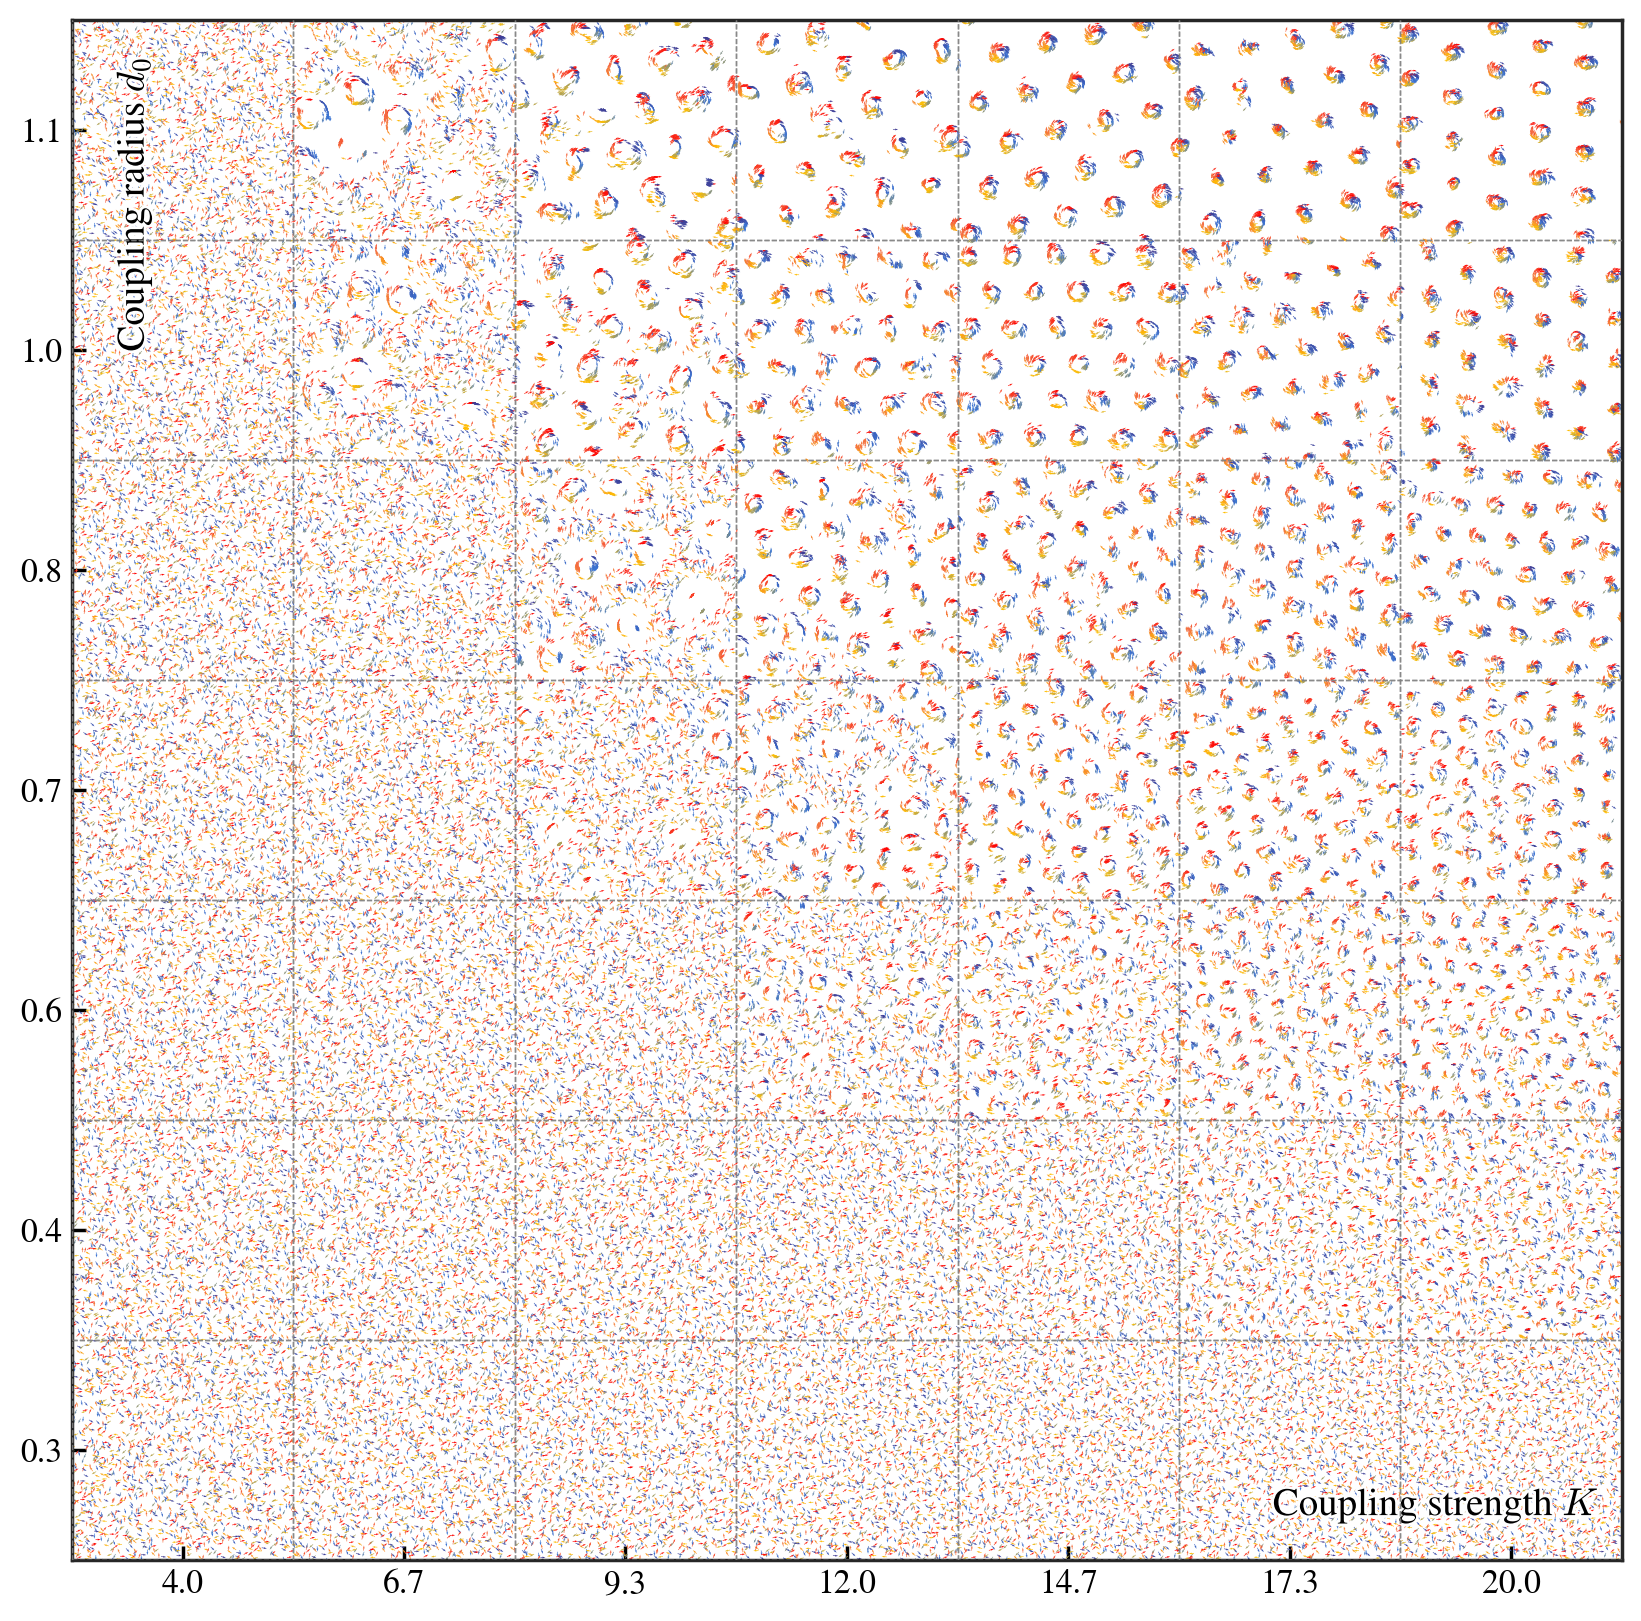

In [76]:
from matplotlib.patheffects import withStroke

colParams = distanceD0s
rowParams = strengthKs
colorsBy = "phase"

# fig, ax = plt.subplots(figsize=(len(rowParams) * 4, len(colParams) * 4))
fig, ax = plt.subplots(figsize=(10, 10))

for i, sa in enumerate(sas):
    if sa is None:
        continue
    row = i // len(rowParams)
    col = i % len(rowParams)
    
    positionShift = np.array([row, col]) * sa.model.boundaryLength
    positionX, phaseTheta = sa.get_state(-1)
    positionX = positionX + positionShift
    if colorsBy == "freq":
        colors = (
            ["red"] * (sa.model.freqOmega >= 0).sum() + 
            ["#414CC7"] * (sa.model.freqOmega < 0).sum()
        )
    elif colorsBy == "phase":
        colors = [cmap(i) for i in
            np.floor(256 - phaseTheta / (2 * np.pi) * 256).astype(np.int32)
        ]

    ax.quiver(
        positionX[:, 0], positionX[:, 1],
        np.cos(phaseTheta), np.sin(phaseTheta), 
        color=colors,
        scale=300, width=0.0004 / len(rowParams) * 7
    )
    ax.axhline(
        y=col * sa.model.boundaryLength, 
        color="gray", linewidth=0.5, linestyle="--", alpha=0.3, zorder=100
    )
    ax.axvline(
        x=row * sa.model.boundaryLength, 
        color="gray", linewidth=0.5, linestyle="--", alpha=0.3, zorder=100
    )

boundaryLength = models[0].boundaryLength
plt.xlim(0, len(rowParams) * boundaryLength)
plt.ylim(0, len(colParams) * boundaryLength)
plt.xticks(
    np.arange(0, len(rowParams) * boundaryLength, boundaryLength) + boundaryLength / 2,
    [f"{k:.1f}" for k in rowParams]
)
plt.yticks(
    np.arange(0, len(colParams) * boundaryLength, boundaryLength) + boundaryLength / 2,
    [f"{d:.1f}" for d in colParams]
)

text1 = plt.text(len(rowParams) * boundaryLength * 0.88, len(rowParams) * boundaryLength * 0.035,
                 "Coupling strength $K$", # weight="bold",
                 fontsize=14, ha="center", va="center")
text2 = plt.text(len(rowParams) * boundaryLength * 0.04, len(rowParams) * boundaryLength * 0.88,
                 "Coupling radius $d_0$", # weight="bold",
                 fontsize=14, ha="center", va="center", rotation=90)
for text in [text1, text2]:
    text.set_path_effects([withStroke(linewidth=2, foreground='white')])
plt.tick_params(length=5, direction="in")
plt.savefig(
    f"figs/{sa.model.__class__.__name__}_"
    f"varying_strengthK_and_distanceD0_{colorsBy}_"
    f"a{phaseLags[0]:.2f}_Do{deltaOmegas[0]}"
    f"{'initPhaseTheta,' if sa.model.initPhaseTheta is not None else ''}"
    f"_aN{sa.model.agentsNum}_dist{sa.model.freqDist}.png", 
    bbox_inches="tight"
)

In [25]:
def calc_lattice_constants(sa: StateAnalysis, plot: bool = False, lookIdx: int = -1):

    sa: StateAnalysis
    model = sa.model
    shift = np.array([0., 0.])
    analysisRadius = model.speedV / np.abs(model.strengthK * np.sin(model.phaseLagA0))

    classes, centers = sa.calc_classes_and_centers(classDistance=analysisRadius, lookIdx=lookIdx)
    if len(classes) > model.agentsNum * 0.2:
        # print(f"Too many classes: {len(classes)} > {model.agentsNum * 0.2}, skipping.")
        return [], []
    numInClasses = np.array([len(c) for c in classes])
    # zScoreNum = stats.zscore(numInClasses)
    # classes = [classes[c] for c in range(len(classes)) 
    #            if (zScoreNum[c] > -0.4) and (numInClasses[c] > 10)]
    numThres = np.median(numInClasses[numInClasses > 10]) * 0.
    classes = [classes[c] for c in range(len(classes))
               if (numInClasses[c] > max(numThres, 10))]
    centers = np.mod(centers + shift, model.boundaryLength)
    if len(classes) <= 1:
        # print("Not enough classes, skipping.")
        return [], []

    classCenters: List[np.ndarray] = []
    for c in classes:
        singleClassCenters = centers[c]

        maxDeltaX = np.abs(singleClassCenters[:, 0] - singleClassCenters[:, 0, np.newaxis]).max()
        subXShift = model.halfBoundaryLength if maxDeltaX > model.halfBoundaryLength else 0
        maxDeltaY = np.abs(singleClassCenters[:, 1] - singleClassCenters[:, 1, np.newaxis]).max()
        subYShift = model.halfBoundaryLength if maxDeltaY > model.halfBoundaryLength else 0

        singleClassCenters = np.mod(singleClassCenters - np.array([subXShift, subYShift]), model.boundaryLength)
        classCenter = np.mod(singleClassCenters.mean(axis=0) + np.array([subXShift, subYShift]), model.boundaryLength)
        classCenters.append(classCenter)
    classCenters: np.ndarray = np.array(classCenters)

    edges, ajdClassCenters = sa.calc_nearby_edges(
        classCenters=classCenters, 
        stdMulti=0.3,
        relativeDistance=False
    )

    classAnalRadius = list()

    for _, oscIdx in enumerate(classes):
        freqOmega: np.ndarray = sa.model.freqOmega[oscIdx]
        meanFreq = freqOmega.mean()
        analRadius = model.speedV / np.abs(meanFreq - model.strengthK * np.sin(model.phaseLagA0))
        
        classAnalRadius.append(analRadius)

    classAnalRadius = np.array(classAnalRadius)
    edgeDistances = np.array([
        sa.calc_replative_distance(ajdClassCenters[edge[0]], ajdClassCenters[edge[1]]) 
        for edge in edges
    ])

    if plot:
        sa.plot_spatial(colorsBy="phase", index=-1, shift=shift)
        plt.scatter(
            classCenters[:, 0], classCenters[:, 1],
            facecolor="white", s=30, edgecolor="black", lw=1.5
        )
        for edge in edges:
            plt.plot(ajdClassCenters[edge, 0], ajdClassCenters[edge, 1],
                    color="black", lw=1.2, alpha=0.3, linestyle=(0, (10, 2)), zorder=0)

    # print(len(classes))

    return classAnalRadius, edgeDistances

In [ ]:
from multiprocessing import Pool

# selectedSas = sas
selectD0s = distanceD0s[:]#[(1 < distanceD0s) & (distanceD0s < 1.05)]
selectKs = strengthKs[:]#[strengthKs > 12]
selectedSas = [
    sa for sa in sas 
    if (sa is not None) and 
    (sa.model.distanceD0 in selectD0s) and 
    (sa.model.strengthK in selectKs)
]

classAnalRadius = dict()
edgeDistances = dict()

for sa in tqdm(selectedSas, total=len(selectedSas)):
    key = (sa.model.strengthK, sa.model.distanceD0)
    classAnalRadius[key] = []
    edgeDistances[key] = []
    for lookIdx in [-1]:
        analRadius, edgeDistance = calc_lattice_constants(sa, plot=False, lookIdx=lookIdx)
        classAnalRadius[key].append(analRadius)
        edgeDistances[key].append(edgeDistance)
    # print(rf"$K={sa.model.strengthK:.2f},d_0={sa.model.distanceD0:.2f}$")

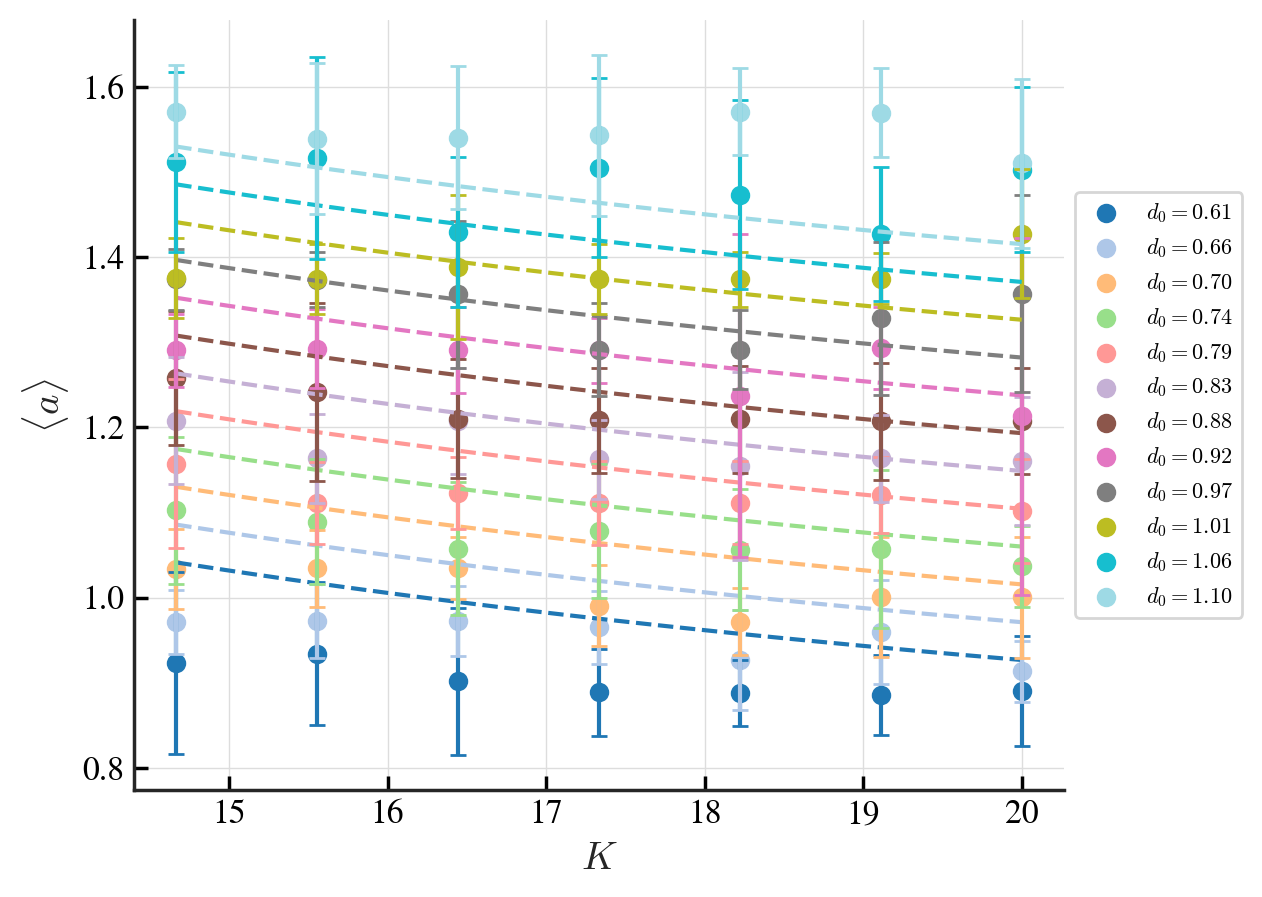

In [72]:
selectD0s = distanceD0s[:][(0.6 < distanceD0s)]
selectKs = strengthKs[:][strengthKs > 14]

fig, ax = plt.subplots(figsize=(6, 5))
colors = plt.cm.tab20(np.linspace(0, 1, len(selectD0s)))

for i, selectD0 in enumerate(selectD0s[:]):
    meanEdgeDistances = np.array([np.mean(edgeDistances[(strengthK, selectD0)]) for strengthK in selectKs])
        
    stdEdgeDistances = np.array([np.std(edgeDistances[(strengthK, selectD0)]) for strengthK in selectKs])
    linspaceKs = np.linspace(selectKs[0], selectKs[-1], 100)
    analysisDis = selectD0 + 2 * model.speedV / np.abs(linspaceKs * np.sin(model.phaseLagA0))

    color = colors[i]
    plt.plot(linspaceKs, analysisDis, ls="--", color=color)
    ax.errorbar(selectKs, meanEdgeDistances, yerr=stdEdgeDistances,
                color="none", ecolor=color, capsize=3, ms=4)
    ax.scatter(selectKs, meanEdgeDistances, color=color, label=f"$d_0={selectD0:.2f}$")

# plt.ylim(0.5, 2)
plt.tick_params(length=5, direction="in")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid()
plt.xlabel(r"$K$", fontsize=14)
plt.ylabel(r"$\langle a \rangle$", fontsize=14)
plt.legend(fontsize=8, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("figs/lattice_constant.pdf", bbox_inches="tight")

In [ ]:
# selectD0s = distanceD0s[1:]  # 3000 uniform
# selectKsDict = {
#     selectD0s[0]: strengthKs[-2:],
#     selectD0s[1]: strengthKs[2:],
#     selectD0s[2]: strengthKs[2:],
#     selectD0s[3]: strengthKs[1:],
#     selectD0s[4]: strengthKs[1:],
#     selectD0s[5]: strengthKs[1:],
# }
selectD0s = distanceD0s[2:]  # 2000 cauchy
selectKsDict = {
    selectD0s[0]: strengthKs[-3:],
    selectD0s[1]: strengthKs[3:],
    selectD0s[2]: strengthKs[3:],
    selectD0s[3]: strengthKs[3:],
    selectD0s[4]: strengthKs[2:]
}

fig, ax = plt.subplots(figsize=(6, 5))

for i, selectD0 in enumerate(selectD0s):
    meanEdgeDistances = [edgeDistances[(strengthK, selectD0)].mean() for strengthK in selectKsDict[selectD0]]
    stdEdgeDistances = [edgeDistances[(strengthK, selectD0)].std() for strengthK in selectKsDict[selectD0]]
    # analysisDis = [
    #     selectD0 + 2 * model.speedV / np.abs(strengthK * np.sin(model.phaseLagA0))
    #     for strengthK in selectKsDict[selectD0]
    # ]
    linspaceKs = np.linspace(
        selectKsDict[selectD0][0], selectKsDict[selectD0][-1], 100
    )
    analysisDis = selectD0 + 2 * model.speedV / np.abs(linspaceKs * np.sin(model.phaseLagA0))

    plt.plot(linspaceKs, analysisDis, ls="--")
    # ax.errorbar(selectKsDict[selectD0], meanEdgeDistances, yerr=stdEdgeDistances,
    #             color="none", ecolor=f"C{i}", capsize=3, ms=4)
    ax.scatter(selectKsDict[selectD0], meanEdgeDistances, color=f"C{i}", label=f"$d_0={selectD0:.2f}$")

plt.legend(fontsize=8)
# plt.ylim(0, 1.5)

In [ ]:
model.distanceD0 + 2 * model.speedV / np.abs(model.strengthK * np.sin(model.phaseLagA0))

In [ ]:
plt.plot([i.mean() for i in edgeDistances.values()])
plt.axhline(y=model.distanceD0 + 2 * model.speedV / np.abs(model.strengthK * np.sin(model.phaseLagA0)),
            color="black", ls="--", lw=1.5, label="Theoretical distance")

In [ ]:
# model = [model for model in models 
#       if (model.distanceD0 == distanceD0s[2]) and 
#       (model.strengthK == strengthKs[-1])][0]
# sa = StateAnalysis(model)

sa: StateAnalysis = [sa for sa in sas
      if (sa.model.distanceD0 == distanceD0s[2]) and
      (sa.model.strengthK == strengthKs[-1])][0]
model = sa.model

shift = np.array([0., 0.])
analysisRadius = model.speedV / np.abs(model.strengthK * np.sin(model.phaseLagA0))

classes, centers = sa.calc_classes_and_centers(classDistance=analysisRadius, lookIdx=-1)
if len(classes) > model.agentsNum * 0.2:
    print(f"Too many classes: {len(classes)} > {model.agentsNum * 0.2}, skipping.")
    # return [], [], []
numInClasses = np.array([len(c) for c in classes])
# zScoreNum = stats.zscore(numInClasses)
# classes = [classes[c] for c in range(len(classes)) 
#            if (zScoreNum[c] > -0.4) and (numInClasses[c] > 10)]
numThres = np.median(numInClasses[numInClasses > 10]) * 0.
classes = [classes[c] for c in range(len(classes))
            if (numInClasses[c] > max(numThres, 10))]
centers = np.mod(centers + shift, model.boundaryLength)
if len(classes) <= 1:
    print("Not enough classes, skipping.")
    # return [], [], []

classCenters: List[np.ndarray] = []
for c in classes:
    singleClassCenters = centers[c]

    maxDeltaX = np.abs(singleClassCenters[:, 0] - singleClassCenters[:, 0, np.newaxis]).max()
    subXShift = model.halfBoundaryLength if maxDeltaX > model.halfBoundaryLength else 0
    maxDeltaY = np.abs(singleClassCenters[:, 1] - singleClassCenters[:, 1, np.newaxis]).max()
    subYShift = model.halfBoundaryLength if maxDeltaY > model.halfBoundaryLength else 0

    singleClassCenters = np.mod(singleClassCenters - np.array([subXShift, subYShift]), model.boundaryLength)
    classCenter = np.mod(singleClassCenters.mean(axis=0) + np.array([subXShift, subYShift]), model.boundaryLength)
    classCenters.append(classCenter)
classCenters: np.ndarray = np.array(classCenters)

len(classes)

In [ ]:
sa.plot_spatial(colorsBy="phase", index=-1, shift=shift)
plt.scatter(
    classCenters[:, 0], classCenters[:, 1],
    facecolor="white", s=30, edgecolor="black", lw=1.5
)

In [ ]:
from scipy import stats

shift = np.array([0., 0.])
analysisRadius = model.speedV / np.abs(model.strengthK * np.sin(model.phaseLagA0))

classes, centers = sa.calc_classes_and_centers(classDistance=analysisRadius, lookIdx=-1)
if len(classes) > model.agentsNum * 0.2:
    print(f"Too many classes: {len(classes)} > {model.agentsNum * 0.2}, skipping.")
    # return [], []
numInClasses = np.array([len(c) for c in classes])
# zScoreNum = stats.zscore(numInClasses)
# classes = [classes[c] for c in range(len(classes)) 
#            if (zScoreNum[c] > -0.4) and (numInClasses[c] > 10)]
numThres = np.median(numInClasses[numInClasses > 10]) * 0.
classes = [classes[c] for c in range(len(classes))
            if (numInClasses[c] > max(numThres, 10))]
centers = np.mod(centers + shift, model.boundaryLength)
if len(classes) <= 1:
    print("Not enough classes, skipping.")
    # return [], [], []

classCenters: List[np.ndarray] = []
for c in classes:
    singleClassCenters = centers[c]

    maxDeltaX = np.abs(singleClassCenters[:, 0] - singleClassCenters[:, 0, np.newaxis]).max()
    subXShift = model.halfBoundaryLength if maxDeltaX > model.halfBoundaryLength else 0
    maxDeltaY = np.abs(singleClassCenters[:, 1] - singleClassCenters[:, 1, np.newaxis]).max()
    subYShift = model.halfBoundaryLength if maxDeltaY > model.halfBoundaryLength else 0

    singleClassCenters = np.mod(singleClassCenters - np.array([subXShift, subYShift]), model.boundaryLength)
    classCenter = np.mod(singleClassCenters.mean(axis=0) + np.array([subXShift, subYShift]), model.boundaryLength)
    classCenters.append(classCenter)
classCenters: np.ndarray = np.array(classCenters)

edges, ajdClassCenters = sa.calc_nearby_edges(
    classCenters=classCenters, 
    stdMulti=0.3,
    relativeDistance=False
)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

plt.scatter(
    classCenters[:, 0], classCenters[:, 1],
    facecolor="white", s=30, edgecolor="black", lw=1.5
)

for edge in edges[:]:
    plt.plot(ajdClassCenters[edge, 0], ajdClassCenters[edge, 1],
             color="black", lw=1.2, alpha=0.3, zorder=0
            #  linestyle=(0, (10, 2))
             )
    # edgeCenter = (ajdClassCenters[edge[0]] + ajdClassCenters[edge[1]]) / 2
    # edgeNodesDelta = ajdClassCenters[edge[0]] - ajdClassCenters[edge[1]]
    # edgeAngle = np.arctan2(edgeNodesDelta[1], edgeNodesDelta[0])
    # edgeShift = np.array([np.cos(edgeAngle), np.sin(edgeAngle)]) * 0.5 * model.distanceD0

    # plt.plot([edgeCenter[0] - edgeShift[0], edgeCenter[0] + edgeShift[0]], 
    #          [edgeCenter[1] - edgeShift[1], edgeCenter[1] + edgeShift[1]],
    #          lw=2, alpha=1, color="gray", ls="-")

analRadius = model.speedV / np.abs(model.strengthK * np.sin(model.phaseLagA0))

for classCenter in classCenters:
    circle = plt.Circle(
        classCenter, analRadius * 1, color="black", fill=False, lw=1, alpha=1, ls="-"
    )
    ax.add_artist(circle)

sa.plot_spatial(ax=ax, colorsBy="phase", index=-1, shift=shift)

# for i, classCenter in enumerate(classCenters):
#     plt.text(
#         classCenter[0] + 0.01, classCenter[1] + 0.1, 
#         f"{i}", ha="left", va="bottom", fontsize=12, color="black"
#     )

plt.tick_params(length=3, direction="in")


In [ ]:
model.distanceD0 + analRadius * 2

In [ ]:
relativeEdges = np.unique(np.mod(edges, len(classes)), axis=0)
np.mean([
    sa.calc_replative_distance(classCenters[edge[0]], classCenters[edge[1]])
    # np.linalg.norm(classCenters[edge[0]] - classCenters[edge[1]])
    for edge in relativeEdges
])

In [ ]:
np.mean([
    np.linalg.norm(ajdClassCenters[edge[0]] - ajdClassCenters[edge[1]])
    for edge in edges
])